# Analysis of Fetal Health Classification Models
**Overview**

This notebook explores various machine learning models to classify fetal health based on physiological parameters. The dataset used contains features related to fetal heart rate, uterine contractions, and other indicators, with the target variable indicating the health status of the fetus as normal, suspect, or pathological.

### Contents
1. Data Loading and Exploration
    * Dataset overview, including feature descriptions and distribution analysis.
2. Exploratory Data Analysis
    * Visualization of the target variable distribution and correlation matrix of features.
3. Modeling
    * Implementation and evaluation of multiple classification models:
        * Logistic Regression
        * Decision Tree Classifier
        * Random Forest Classifier
        * Gradient Boosting Classifier
4. Model Evaluation and Tuning
    * Evaluation metrics such as accuracy and cross-validation scores.
    * Hyperparameter tuning using GridSearchCV and RandomizedSearchCV to optimize model performance.
5. Conclusion
    * Summary of findings and recommendations based on model performance.
    
### Models Used
* Logistic Regression: Linear model for binary classification.
* Decision Tree Classifier: Tree-based model for classification.
* Random Forest Classifier: Ensemble of decision trees for improved performance.
* Gradient Boosting Classifier: Boosting technique to sequentially improve model accuracy.


## IMPORTING LIBRARIES

In [71]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
np.random.seed(0)

## LOADING DATA

In [2]:
data = pd.read_csv("fetal_health.csv")
data.head(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

**No missing values in the dataset**

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


**Data Dictionary**

* **'baseline value'** Fetal Heart Rate (FHR) baseline (beats per minute)
* **'accelerations'** Number of accelerations per second
* **'fetal_movement'** Number of fetal movements per second
* **'uterine_contractions'** Number of uterine contractions per second
* **'light_decelerations'** Number of light decelerations per second
* **'severe_decelerations'** Number of severe decelerations per second
* **'prolongued_decelerations'** Number of prolonged decelerations per second
* **'abnormal_short_term_variability'** Percentage of time with abnormal short term variability
* **'mean_value_of_short_term_variability'** Mean value of short term variability
* **'percentage_of_time_with_abnormal_long_term_variability'** Percentage of time with abnormal long term variability
* **'mean_value_of_long_term_variability'** Mean value of long term variability 
* **'histogram_width'** Width of FHR histogram
* **'histogram_min' Minimum** (low frequency) of FHR histogram
* **'histogram_max' Maximum** (high frequency) of FHR histogram
* **'histogram_number_of_peaks'** Number of histogram peaks
* **'histogram_number_of_zeroes'** Number of histogram zeros
* **'histogram_mode'** Histogram mode
* **'histogram_mean'** Histogram mean
* **'histogram_median'** Histogram median
* **'histogram_variance'** Histogram variance
* **'histogram_tendency'** Histogram tendency
* **'fetal_health'** Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)

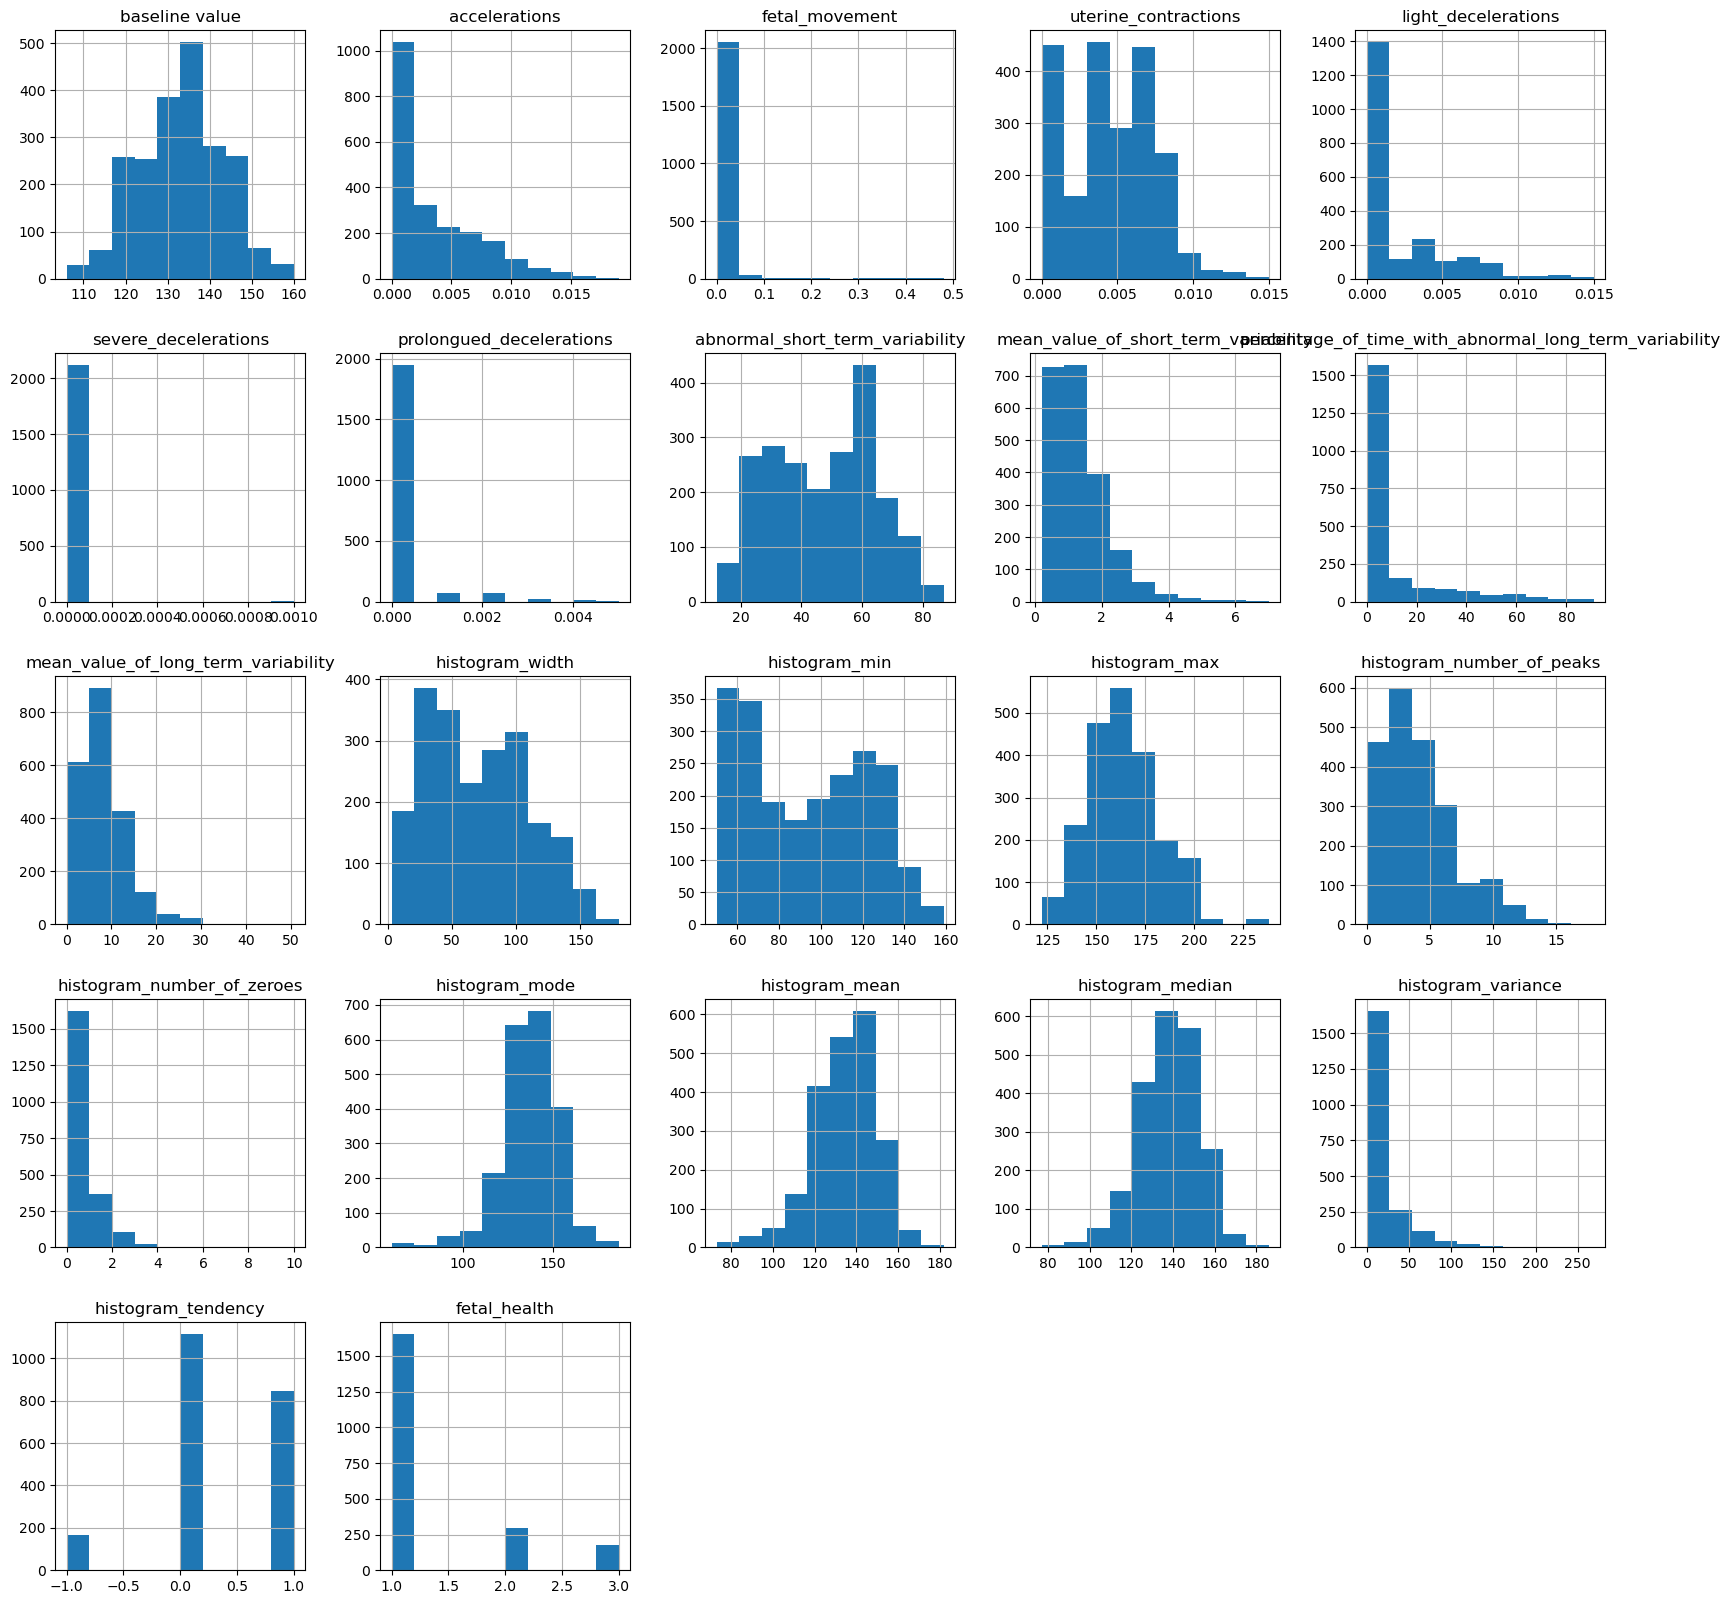

In [6]:
# Evaluating distributions of the features 
hist_plot = data.hist(figsize = (20,20))

* A lot of the attributes are skewed.

## Evaluating Target Vector (fetal_health)

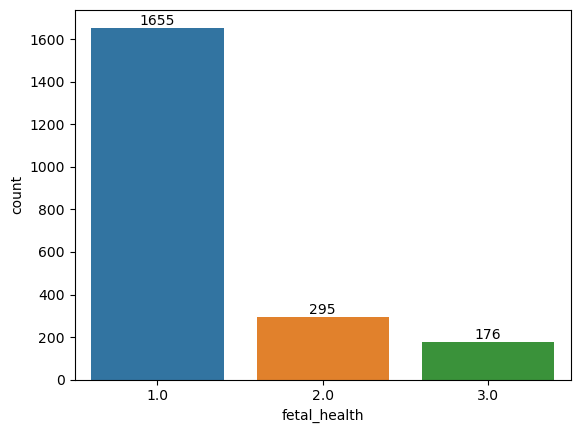

In [7]:
#Evaluating the target vector to find out data imbalance

plot1 = sns.countplot(data = data, x="fetal_health")
plot1.bar_label(container=plot1.containers[0]);

* Target Labels are highly imbalanced.

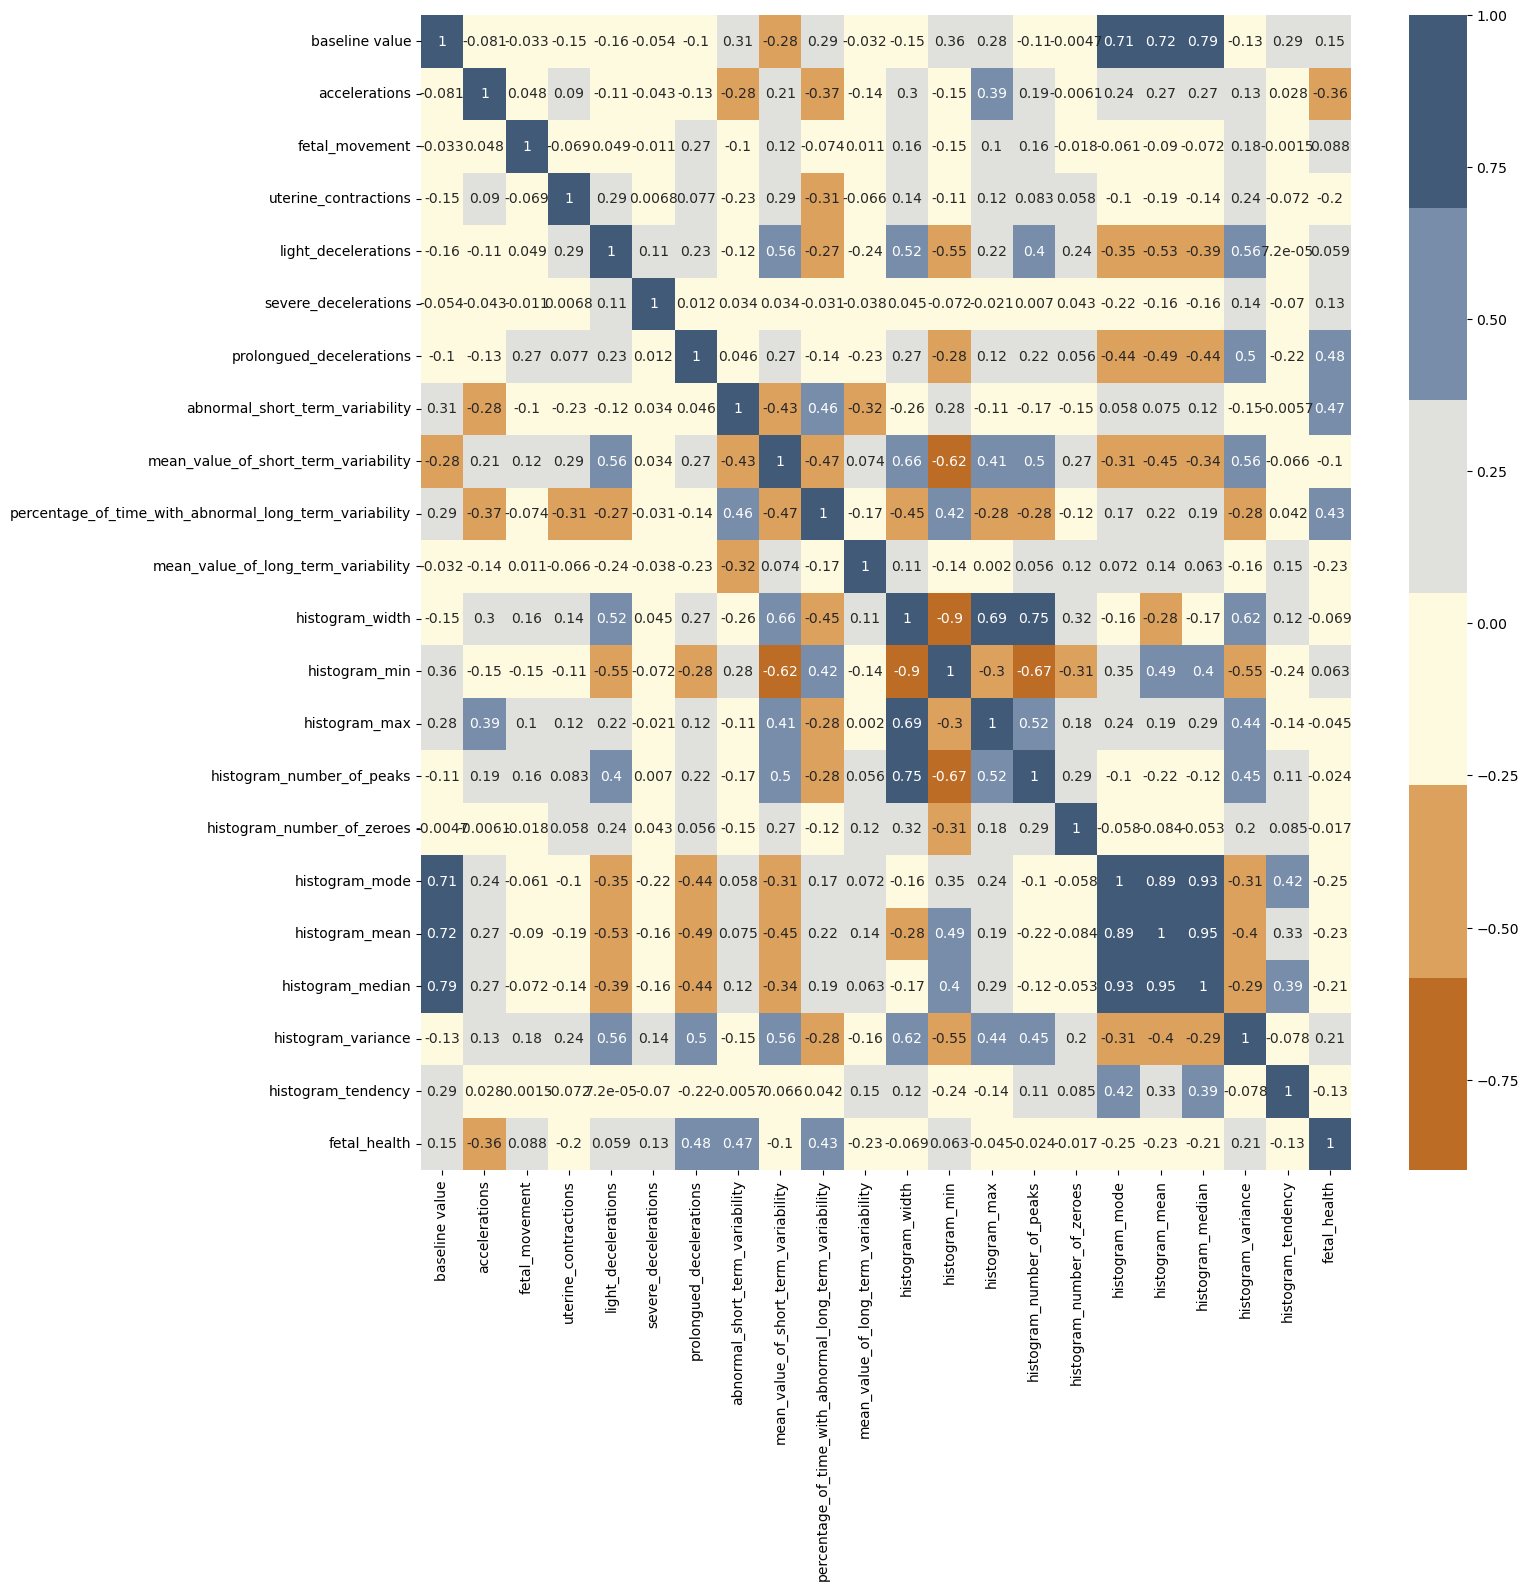

In [8]:
#Correlation matrix to provide better insight to the imbalance
corrmat= data.corr()
plt.figure(figsize=(15,15))  

cols = (["#BC6C25", "#DDA15E", "#FEFAE0", "#E0E1DD", "#778DA9", "#415A77"])

sns.heatmap(corrmat, annot=True, cmap=cols);

In [9]:
# Spliting df into feature matrix (X) and target vector (y).
X=data.drop(["fetal_health"], axis=1)
y=data["fetal_health"]

In [10]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Calculate the Baseline Accuracy Score

In [16]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.78


## Logistic Regression

In [73]:
model_lr = make_pipeline(
    LogisticRegression(max_iter=10000)
)

model_lr.fit(X_train, y_train)

Pipeline(steps=[('logisticregression', LogisticRegression(max_iter=10000))])

**Evaluating the model**

In [74]:
acc_train = accuracy_score(y_train, model_lr.predict(X_train))
acc_test = accuracy_score(y_test, model_lr.predict(X_test))

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.88
Test Accuracy: 0.89


## Communicating Results

In [75]:
y_train_pred_proba = model_lr.predict_proba(X_train)
print(y_train_pred_proba[:5])

[[9.89011529e-01 1.09341981e-02 5.42733212e-05]
 [2.87839144e-01 6.94504440e-01 1.76564156e-02]
 [9.98580223e-01 1.40070649e-03 1.90707604e-05]
 [9.81683184e-01 1.83161453e-02 6.70220372e-07]
 [8.58913667e-01 1.40813160e-01 2.73172847e-04]]


### Features and Importances

In [76]:
# Get the logistic regression model from the pipeline
logistic_regression = model_lr.named_steps['logisticregression']

# Retrieve features and Importances
features = list(X_train.columns)
importances = logistic_regression.coef_[0]

In [77]:
feat_imp = pd.Series(np.exp(importances), index=features).sort_values()
feat_imp.head()

fetal_movement                         0.125209
histogram_tendency                     0.713643
baseline value                         0.824468
mean_value_of_long_term_variability    0.883501
abnormal_short_term_variability        0.925540
dtype: float64

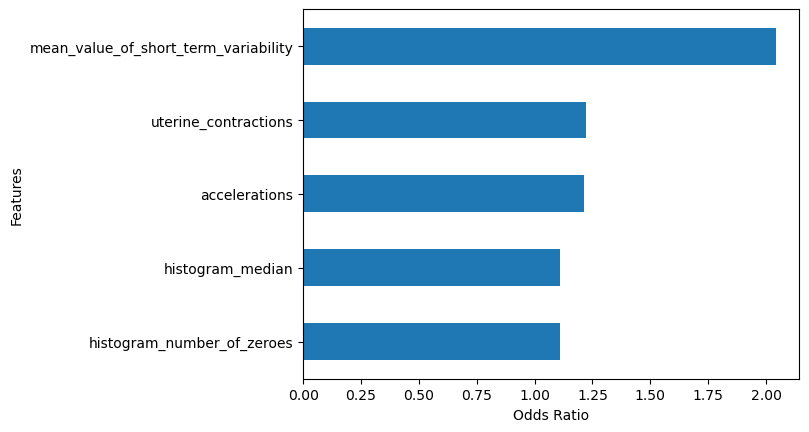

In [46]:
feat_imp.tail(5).plot(kind="barh")
plt.xlabel('Odds Ratio')
plt.ylabel('Features');

* This plot indicates the features with the odds most likely to cause fetal death.

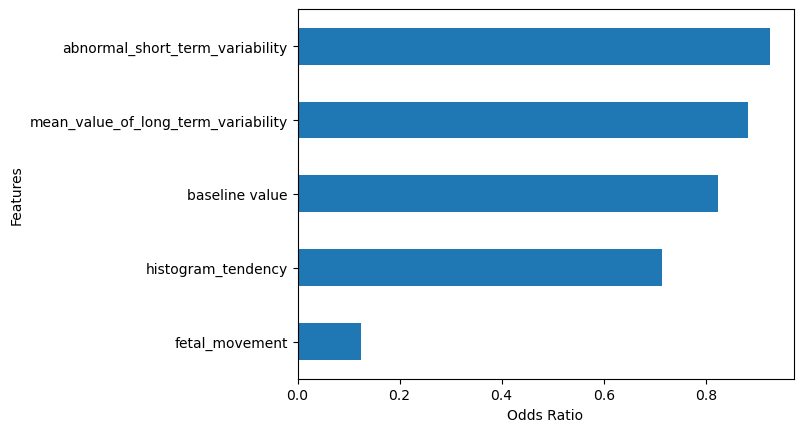

In [47]:
feat_imp.head(5).plot(kind="barh")
plt.xlabel('Odds Ratio')
plt.ylabel('Features');

* This plot indicates the features with the odds least likely to cause fetal death.

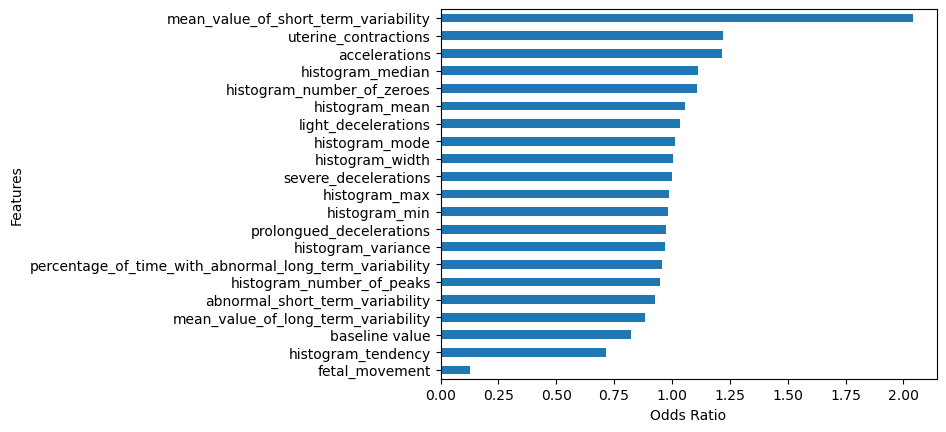

In [48]:
feat_imp.plot(kind="barh")
plt.xlabel('Odds Ratio')
plt.ylabel('Features');

* This plot indicates all features with their odds of likely causing fetal death.

## Decision Tree Classifier

In [49]:
model_dt = make_pipeline(
    DecisionTreeClassifier(random_state=42)
)

model_dt.fit(X_train,y_train)

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [50]:
acc_train_dt = accuracy_score(y_train, model_dt.predict(X_train))
acc_test_dt = accuracy_score(y_test, model_dt.predict(X_test))

print("Training Accuracy:", round(acc_train_dt, 2))
print("Test Accuracy:", round(acc_test_dt, 2))

Training Accuracy: 1.0
Test Accuracy: 0.92


* While the test accuracy of 92% is good, the perfect training accuracy suggests potential overfitting. Revising the hyperparameters and using cross-validation can help improve the model's performance and generalizability.

In [72]:
param_grid = {
    'decisiontreeclassifier__max_depth': [None, 10, 20, 30],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(model_dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)


grid_search_dt.fit(X_train, y_train)

best_params_dt = grid_search_dt.best_params_
best_model_dt = grid_search_dt.best_estimator_

best_model_score_dt = accuracy_score(y_test, best_model_dt.predict(X_test))
print("Best Model Test Accuracy:", round(best_model_score_dt, 2))

Best Model Test Accuracy: 0.93


* The Best Model Test Accuracy of 93% indicates that the model generalizes well to new, unseen data, achieving high accuracy.

In [60]:
cv_scores = cross_val_score(model_dt, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy: {:.2f} (+/- {:.2f})".format(cv_scores.mean(), cv_scores.std() * 2))

Cross-Validation Accuracy: 0.91 (+/- 0.02)


* The Cross-Validation Accuracy of 91% (+/- 0.02) demonstrates that the model's performance is robust and stable across different subsets of the training data.

* These scores collectively suggest that the decision tree classifier, after hyperparameter tuning and cross-validation, is performing effectively and reliably on the given dataset.

## Random Forest Classification

In [61]:
model_rf = make_pipeline(
    RandomForestClassifier(random_state=42)
)

model_rf.fit(X_train, y_train)

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [62]:
acc_train_rf = accuracy_score(y_train, model_rf.predict(X_train))
acc_test_rf = accuracy_score(y_test, model_rf.predict(X_test))

print("Training Accuracy:", round(acc_train_rf, 2))
print("Test Accuracy:", round(acc_test_rf, 2))


Training Accuracy: 1.0
Test Accuracy: 0.95


* The training accuracy is 1.0, indicating perfect accuracy on the training set, which may suggest overfitting.
* The test accuracy is 0.95, which is high and suggests good performance on unseen data.

In [63]:
param_grid_rf = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(model_rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

best_model_score_rf = accuracy_score(y_test, best_model_rf.predict(X_test))
print("Best Model Test Accuracy:", round(best_model_score_rf, 2))

Best Model Test Accuracy: 0.95


* The best model test accuracy remains at 0.95, indicating that hyperparameter tuning did not significantly improve performance, but it did help confirm the robustness of the initial model.

In [64]:
cv_scores_rf = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy: {:.2f} (+/- {:.2f})".format(cv_scores_rf.mean(), cv_scores_rf.std() * 2))

Cross-Validation Accuracy: 0.94 (+/- 0.02)


* The cross-validation accuracy is 0.94 with a small variability (+/- 0.02), indicating that the model performs consistently well across different subsets of the training data.

## Gradient Boosting Classification

In [65]:
model_gb = make_pipeline(
    GradientBoostingClassifier(random_state=42)
)

model_gb.fit(X_train, y_train)


Pipeline(steps=[('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))])

In [66]:
acc_train_gb = accuracy_score(y_train, model_gb.predict(X_train))
acc_test_gb = accuracy_score(y_test, model_gb.predict(X_test))

print("Training Accuracy:", round(acc_train_gb, 2))
print("Test Accuracy:", round(acc_test_gb, 2))

Training Accuracy: 0.99
Test Accuracy: 0.95


* The training accuracy is 0.99, indicating very high accuracy on the training set, which suggests potential overfitting.
* The test accuracy is 0.95, indicating good performance on unseen data but slightly lower than the training accuracy, which suggests overfitting but still good generalization.

In [69]:
# Define the parameter grid for RandomizedSearchCV
param_distributions_gb = {
    'gradientboostingclassifier__n_estimators': [100, 200, 300],
    'gradientboostingclassifier__learning_rate': [0.01, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [3, 5, 7],
    'gradientboostingclassifier__min_samples_split': [2, 5, 10],
    'gradientboostingclassifier__min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV with 5-fold cross-validation
random_search_gb = RandomizedSearchCV(
    model_gb, 
    param_distributions=param_distributions_gb, 
    n_iter=50,  # Number of parameter settings that are sampled
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1, 
    random_state=42
)

# Perform the randomized search
random_search_gb.fit(X_train, y_train)

# Retrieve the best parameters and the best model
best_params_gb = random_search_gb.best_params_
best_model_gb = random_search_gb.best_estimator_

# Evaluate the best model on the test set and print the test accuracy
best_model_score_gb = accuracy_score(y_test, best_model_gb.predict(X_test))
print("Best Model Test Accuracy:", round(best_model_score_gb, 2))

Best Model Test Accuracy: 0.96


* The best model test accuracy is 0.96, indicating a slight improvement after hyperparameter tuning.

In [70]:
# Perform cross-validation on the initial model
cv_scores_gb = cross_val_score(best_model_gb, X_train, y_train, cv=5, scoring='accuracy')

# Print the mean cross-validation accuracy and its variability
print("Cross-Validation Accuracy: {:.2f} (+/- {:.2f})".format(cv_scores_gb.mean(), cv_scores_gb.std() * 2))

Cross-Validation Accuracy: 0.95 (+/- 0.02)


* The cross-validation accuracy is 0.95 with a small variability (+/- 0.02), indicating that the model performs consistently well across different subsets of the training data.

## Model Selection

In [81]:
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting"]
test_scores = [model_lr.score(X_test, y_test),
               model_dt.score(X_test, y_test),
               model_rf.score(X_test, y_test),
               model_gb.score(X_test, y_test)]

# Creating a DataFrame to display model performance
results_test = pd.DataFrame({
    "Model": model_names,
    "Test Accuracy": test_scores
})

# Sorting models by descending test accuracy
results_test = results_test.sort_values(by="Test Accuracy", ascending=False)
results_test = results_test.set_index("Test Accuracy")

# Displaying the top performing models
results_test

,Model
Test Accuracy,
0.948357,Gradient Boosting
0.946009,Random Forest
0.922535,Decision Tree
0.892019,Logistic Regression


The test accuracy results for the models show that Gradient Boosting achieved the highest performance with approximately 94.84%, followed closely by Random Forest at 94.60%. Decision Tree performed slightly lower with an accuracy of about 92.25%, while Logistic Regression had the lowest accuracy at 89.20%. These findings indicate that ensemble methods like Gradient Boosting and Random Forest are well-suited for the dataset, demonstrating strong predictive power on unseen data compared to simpler models like Decision Tree and Logistic Regression.

Thank you for exploring the model performance with me. Kindly engage as your engagement helps in understanding and improving the effectiveness of different machine learning approaches.